# Метод K ближайших соседей

In [1]:
import numpy as np
import scipy
import math as m
from matplotlib import pyplot as plt 

Показанный ниже код решает задачу, если известны обучающие примеры и соответствующие им метки. Примеры и метки можно передать в виде строк массива или просто списками. Это могут быть числа, строки — вообще все, что угодно. 

In [2]:
# Добавьте следующий класс в файл knn.py: 

class KnnClassifier (object) :
  def __init__(self, labels, samples) :
    self.labels = labels
    self.samples = samples
  def classify(self, point, k=3) :
    # Вычислить расстояние до всех точек обучающего набора
    dist = np.array([self.l2dist(point,s) for s in self.samples])
    # отсортировать их
    ndx = dist.argsort ()
    # сохранить К ближайших в словаре
    votes = {}
    for i in range(k):
        label = self.labels[ndx[i]]
        votes.setdefault (label, 0)
        votes[label] += 1
    return max(votes)
  def l2dist(self, p1,p2):
    return m.sqrt(sum((p1-p2)**2))


## Простой двумерный пример

Создадим несколько простых наборов точек на плоскости и наглядно покажем, как работает классификатор. Следующий скрипт создает два набора точек, принадлежащих двум классам, и сохраняет данные с помощью модуля pickle:

In [3]:
from numpy.random import randn
import pickle
# создать демонстрационные наборы точек на плоскости
n = 200
# два нормальных распределения
class_1 = 0.6 * randn(n,2)
class_2 = 1.2 * randn(n,2) + np.array([5,1])
labels = np.hstack((np.ones(n),-np.ones(n)))
# сохранить с помощью pickle
with open('points_normal.pkl', 'wb') as f:
    pickle.dump(class_1, f)
    pickle.dump(class_2, f)
    pickle.dump (labels, f)
# нормальное распределение и кольцо вокруг него 
class_1 = 0.6 * randn(n,2)
r= 0.8 * randn(n,1) + 5
angle = 2*np.pi* randn(n,1)
class_2 = np.hstack((r*np.cos (angle) ,r*np.sin(angle) ))
labels = np.hstack((np.ones(n),-np.ones(n)))
# сохранить с помощью pickle
with open('points_ring.pkl', 'wb') as f:
    pickle.dump(class_1,f)
    pickle.dump(class_2, f)
    pickle. dump (labels, f)

Выполним скрипт дважды с разными именами файлов, например, сначала points_normal_test.pkl, а затем points_ring_test.pkl. Теперь у вас четыре файла с наборами данных, по два для каждого распределения. Один будем использоваться для обучения, другой — для тестирования.

In [4]:
#загрузить точки с помощью pickle
with open('points_ring.pkl', 'rb') as f:
    class_1 = pickle.load(f)
    class_2 = pickle.load(f)
    labels = pickle.load(f)
    model = KnnClassifier(labels, np.vstack((class_1,class_2)))


Он создает модель KNN -классификатора на основе данных в pickle-файле. 

In [5]:
# загрузить тестовые данные с помощью pickle
with open('points_ring.pkl', 'rb') as f:
    class_l = pickle.load(f)
    class_2 = pickle.load(f)
    labels = pickle.load(f)
# протестировать на первой точке
print (model.classify(class_1[0]))


1.0


Здесь мы загружаем другой набор данных (тестовый) и печатаем на консоли предсказанную метку класса для первой точки.

Чтобы визуализировать классификацию всех тестовых точек и показать, насколько хорошо классификатор разделяет два класса, добавим такие строчки:

In [6]:
def plot_2D_boundary(plot_range, points, decisionfcn, labels, values=[0]):
    """Plot_range – это диапозон (xmin,xmax,ymin, ymax), points — список точек, decisionfcn – функция приниающая решение, labels – массив меток классов, который возвращает decisionfcn, values — список подлежащих показу изолиний решающей функции"""
    clist = ['b','r','g','k', 'm', 'y'] # цвета соответствующие классам
    # вычислить и нанести на сетку изолинию решающей функции
    x=np.arange(plot_range[0],plot_range[1],.1)
    y = np.arange(plot_range[2],plot_range[3],.1)
    xx, yy = np.meshgrid(x,y)
    xxx, yyy = xx.flatten(),yy.flatten() # списки x,y на  сетке
    zz = np.array(decisionfcn(xxx, yyy) )
    zz = zz.reshape(xx.shape)
    # нанести на график изолинии из списка values
    plt.contour(xx, yy, zz, values)
    # Для каждого класса нанести на график точки обозначив '*' правильные', 'o' — не правильные
    for i in range(len(points)):
        d = decisionfcn(points[i][:,0],points[i] [:,1])
        correct_ndx = labels[i]==d
        incorrect_ndx = labels[i]!=d
        plt.plot(points [i] [correct_ndx,0],points[i] [correct_ndx,1],'*', color=clist[i])
        plt.plot (points [i] [incorrect_ndx, 0], points [i] [incorrect_ndx,1],'o', color=clist[i])
    plt.axis ('equal')

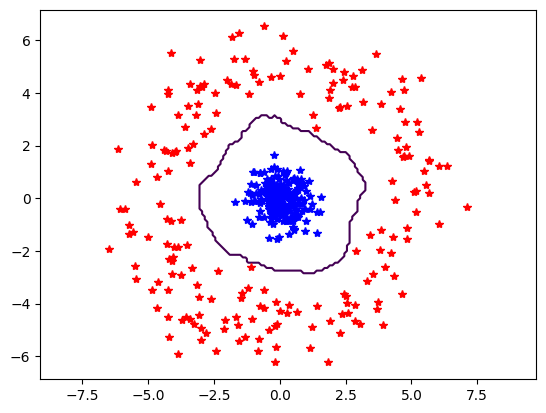

In [7]:
# определить функцию построения графика
def classify (x,y,model=model) :
    return np.array([model.classify([xx,yy]) for (xx,yy) in zip(x,y)])

# нанести на график границу между графиками
plot_2D_boundary([-6, 6,-6, 6], [class_1, class_2],classify, [1,-1])
plt.show()
